# 펭귄 몸무게 예측 경진대회 EDA

<img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/lter_penguins.png" width=1000>   

안녕하세요! 펭귄 몸무게 예측 경진대회로 돌아온 데이콘 Basic 입니다!

이번 대회는 주어진 펭귄의 종, 부리 길이, 성별 등의 정보들을 통해 몸무게(target)를 예측하는 대회입니다.

target은 그램(g) 단위의 수치로 이루어져 있습니다.

대회를 시작하기 앞서 어떤 데이터가 주어졌고 어떤 방식으로 활용할 수 있을지 

데이터를 분석하고 시각화하며 인사이트를 얻어내는 작업이 필요합니다.

<img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/man/figures/culmen_depth.png" width=1000>

Artwork by @allison_horst  
원 출처: https://github.com/allisonhorst/palmerpenguins

위 사진은 데이터의 제작자인 allison_horst 가 데이터 이해를 돕기 위해 그린 그림입니다.

주어진 데이터의 펭귄은 Chinstrap, Gentoo, Adelie 총 3 종이며, Culmen은 펭귄의 부리를 의미합니다.

## 패키지 설치

EDA를 시작하기에 앞서 필요한 패키지들을 설치합니다.

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install sklearn

## 데이터 불러오기

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('dataset/train.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)

data # 데이터를 확인합니다.

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


데이터를 보아하니 species, island, clutch completion, sex 는 텍스트로 이루어진 카테고리형 데이터네요.

분석 전에 적절한 처리가 필요할 것 같습니다.

## 결측치 확인

결측치(NA: Not Available)란 값이 누락된 데이터를 말합니다.

보다 정확한 분석을 하기 위해서는 데이터의 결측치를 확인하고 적절히 처리해주어야 합니다.

이번 데이터에 결측치가 있나 확인해볼까요?

In [3]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 있는 컬럼은: Sex입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 15 N (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.
결측치가 있는 컬럼은: Delta 13 C (o/oo)입니다
해당 컬럼에 총 3개의 결측치가 존재합니다.


### 결측치 처리

이번 데이터에는 결측치가 존재하네요.

원활한 분석을 위해 적절하게 결측치들을 처리해 줍시다.

In [4]:
# 결측치가 있는 row들을 확인합니다.
data[data.isna().sum(axis=1) > 0]

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


결측치들에 대해서 어떤 특별한 패턴은 보이지 않네요.

카테고리형 데이터에 대해서는 행을 삭제하고

수치형 데이터에 대해서는 평균값을 채워주겠습니다.

In [5]:
# 결측치를 처리하는 함수를 작성합니다.
def handle_na(data, missing_col):
    temp = data.copy()
    for col, dtype in missing_col:
        if dtype == 'O':
            # 카테고리형 feature가 결측치인 경우 해당 행들을 삭제해 주었습니다.
            temp = temp.dropna(subset=[col])
        elif dtype == int or dtype == float:
            # 수치형 feature가 결측치인 경우 평균값을 채워주었습니다.
            temp.loc[:,col] = temp[col].fillna(temp[col].mean())
    return temp

data = handle_na(data, missing_col)

# 결측치 처리가 잘 되었는지 확인해 줍니다.
missing_col = check_missing_col(data) 

결측치가 존재하지 않습니다


## 기초 통계 분석

이제 본격적으로 우리가 가진 데이터를 분석 해보도록 하겠습니다!

주어진 데이터를 기초 통계량이라는 숫자로 요약하고 확인해보겠습니다.

In [6]:
# 기초 통계량을 살펴봅니다.
data.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,44.717117,17.000000,203.162162,8.738543,-25.718804,4333.333333
std,5.290899,1.925192,14.731253,0.564470,0.851332,787.518639
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.450000,15.250000,190.000000,8.274020,-26.408475,3675.000000
50%,45.200000,17.200000,199.000000,8.634880,-25.898340,4250.000000
75%,49.150000,18.600000,216.000000,9.264635,-25.005945,4875.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


분석의 편의를 위해 수치형 feature와 카테고리형 feature를 분리해주겠습니다.

In [7]:
# 전체의 데이터 타입을 확인합니다
data.dtypes

Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

In [8]:
numeric_feature = data.columns[(data.dtypes==int) | (data.dtypes== float)]
categorical_feature = data.columns[data.dtypes=='O']

print("수치형 데이터는 다음과 같습니다. \n", list(numeric_feature))
print("카테고리형 데이터는 다음과 같습니다. \n", list(categorical_feature))

수치형 데이터는 다음과 같습니다. 
 ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Body Mass (g)']
카테고리형 데이터는 다음과 같습니다. 
 ['Species', 'Island', 'Clutch Completion', 'Sex']


### 수치형 데이터 시각화

Box plot 을 이용해서 수치형 데이터를 시각화합니다.

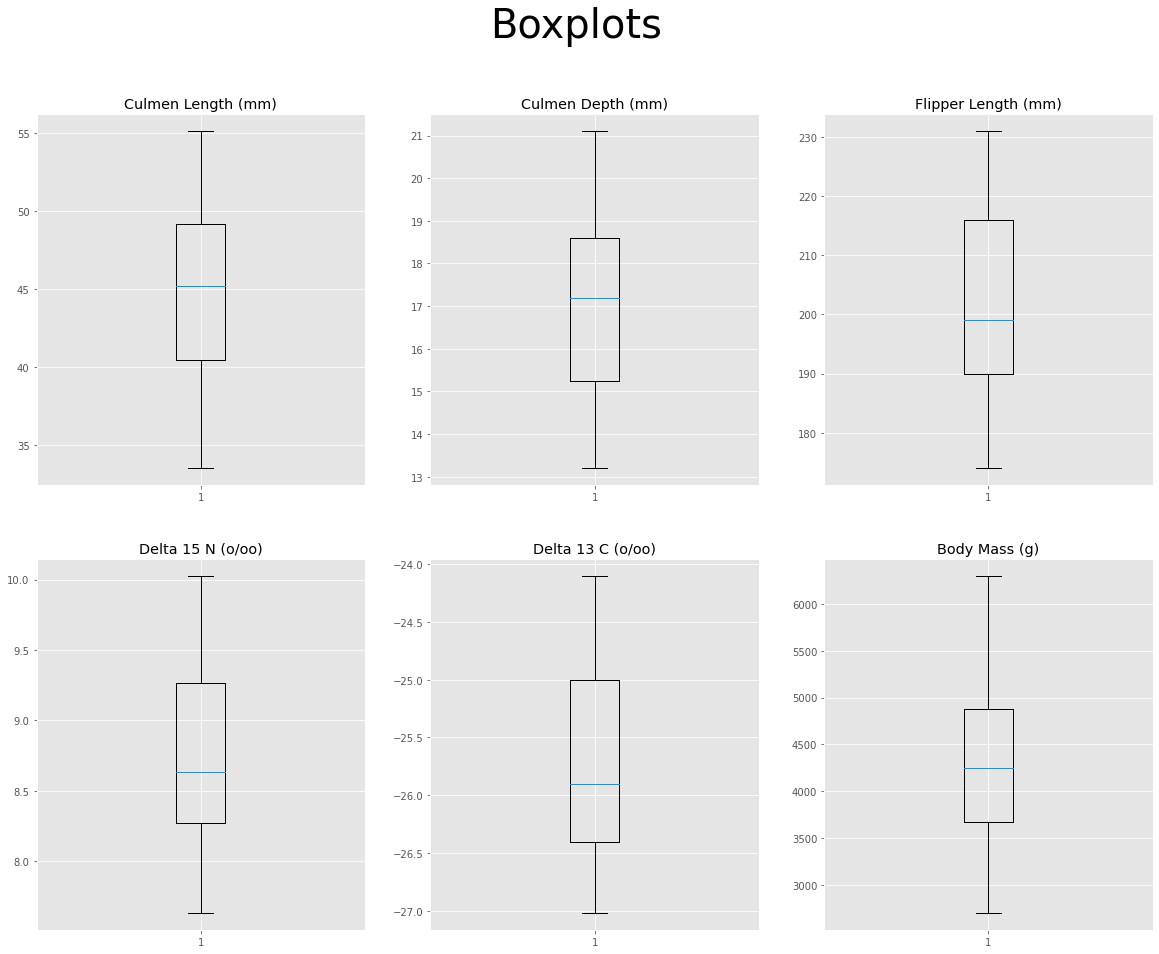

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

feature = numeric_feature

# Boxplot 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,3,i+1)
    plt.title(feature[i])
    plt.boxplot(data[feature[i]])
plt.show()

수치형 데이터는 모두 정상적으로 보이며 특이한 점은 없는 것 같습니다.

### 카테고리형 데이터 시각화

Bar plot을 이용해 카테고리형 데이터를 시각화 합니다.

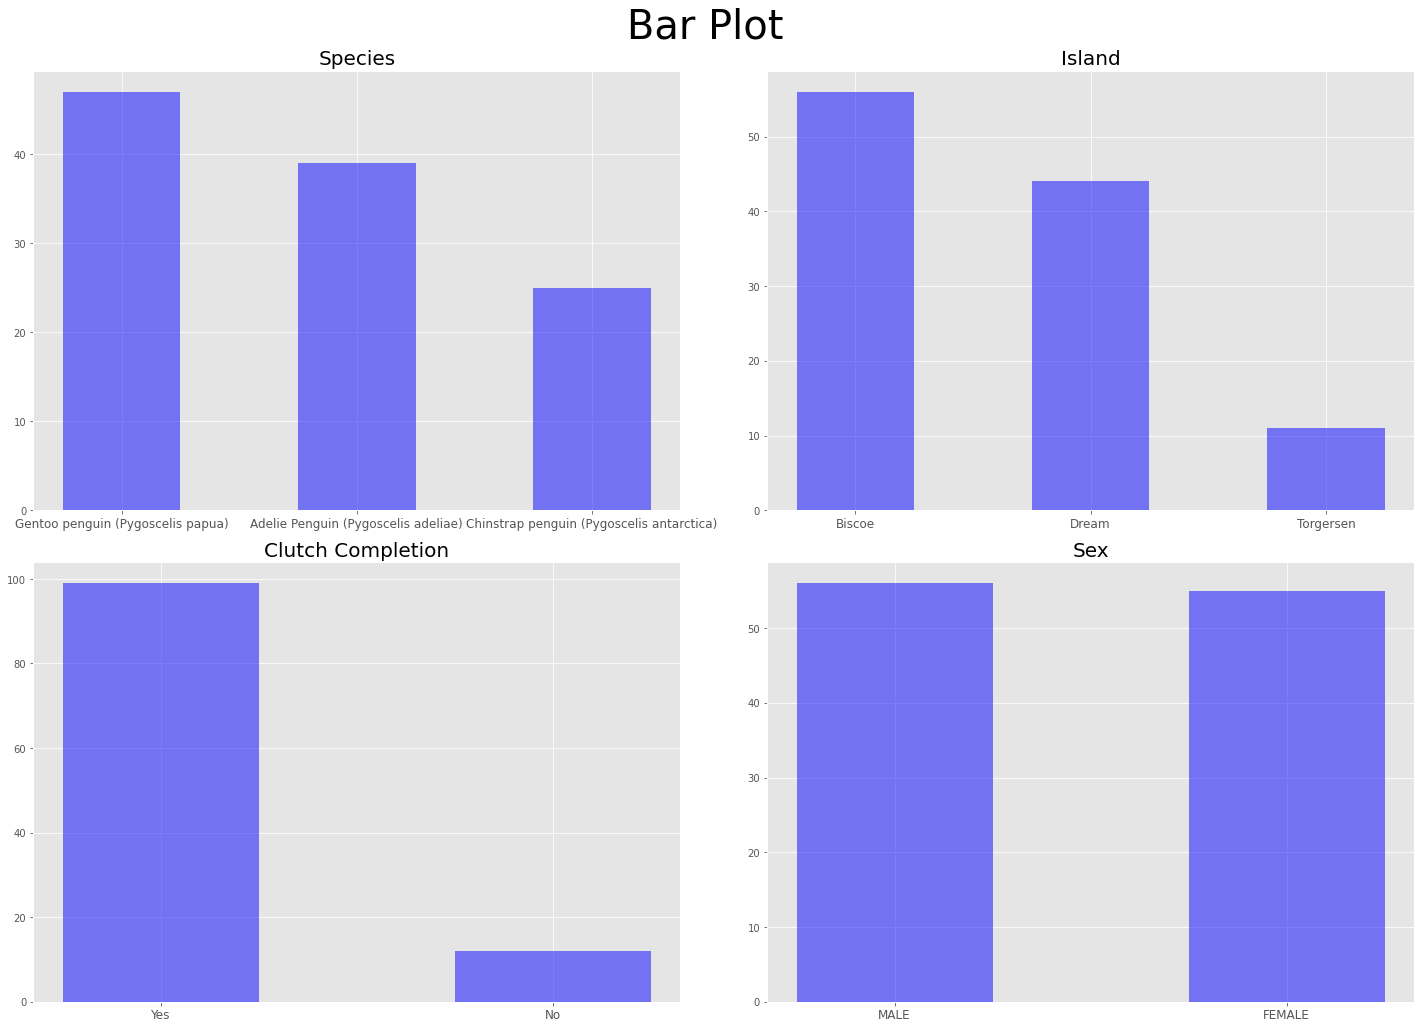

In [10]:
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Bar Plot", fontsize=40)

for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.title(feature[i], fontsize=20)
    temp = data[feature[i]].value_counts()
    plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
    plt.xticks(temp.keys(), fontsize=12)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- Species : Gentoo penguin이 가장 많음
- Island : Biscore가 가장 많음
- Clutch Completetion : data imbalance가 심함
- Sex : 두 카테고리 모두 동일한 비율을 보임

## 상관관계 시각화

feature들 간의 상관관계를 살펴보는 것은 분석에 많은 도움이 됩니다.

먼저 전체 feature들 간의 상관관계를 살펴본 뒤

주요 feature와 타겟 feature의 상관관계를 산점도를 통해 살펴보겠습니다.


In [11]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
from sklearn.preprocessing import LabelEncoder

corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

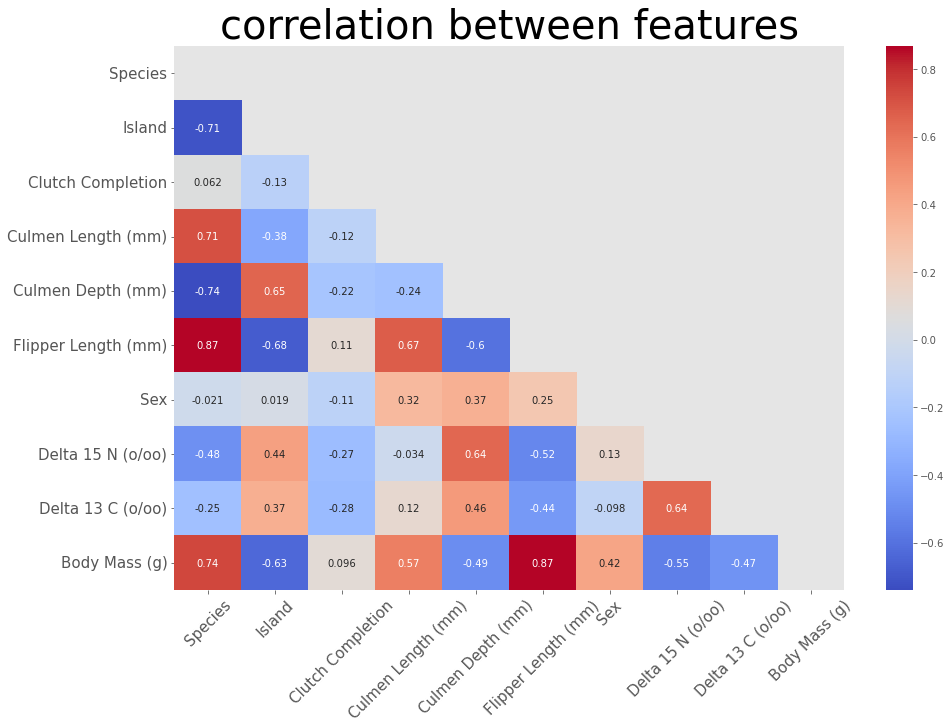

In [12]:
#상관관계 분석도
plt.figure(figsize=(15,10))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

target feature인 Body Mass (g) 는 Flipper Length (mm)와 가장 높은 상관(0.87)을 보이네요!

그 이외에도 Species, Island, Culmen Length (mm), Delta 15 N (o/oo) 와도 높은 상관을 보입니다.

## Target과 다른 feature들과의 관계

상관 분석을 통해 얻은 결과를 좀 더 자세하게 살펴보겠습니다.

In [13]:
target = "Body Mass (g)"

### target과 수치형 feature의 관계

수치형 feature를 시각화하기 위해 scatter plot을 이용해보겠습니다.

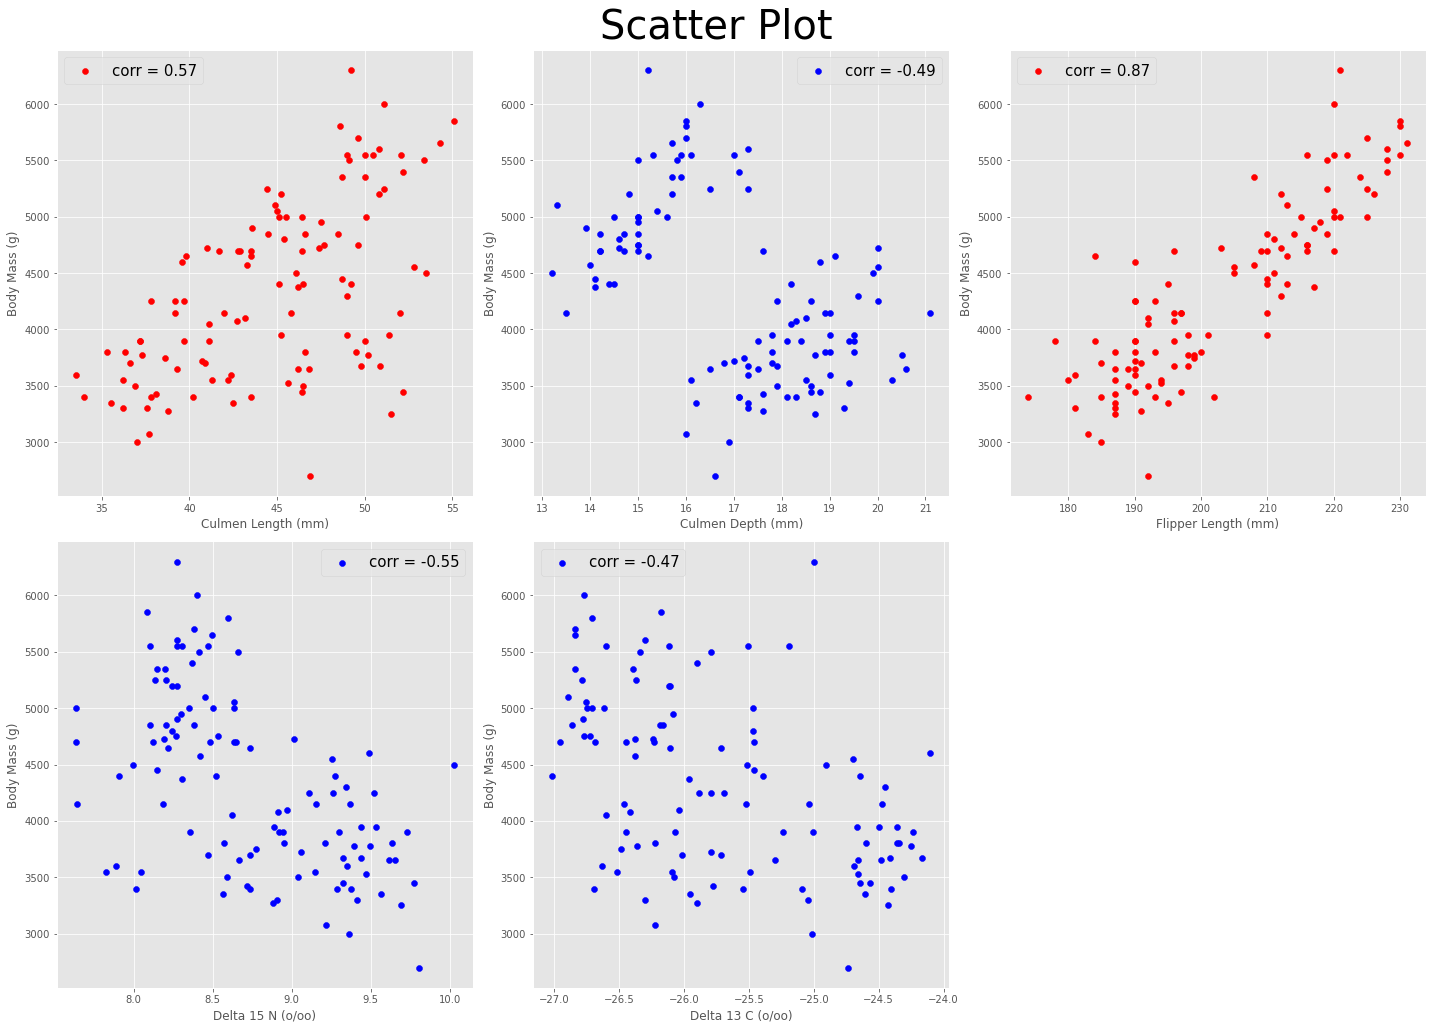

In [14]:
feature = numeric_feature

plt.figure(figsize=(20,15))
plt.suptitle("Scatter Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature[:-1])):
    plt.subplot(2,3,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    corr_score = data[[feature[i], target]].corr().iloc[0,1].round(2)
    c = 'red' if corr_score > 0 else 'blue'
    plt.scatter(data[feature[i]], data[target], color=c, label=f"corr = {corr_score}")
    plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### target과 카테고리형 feature의 관계

카테고리에 따른 target feature의 분포를 살펴보기 위해 violin 그래프를 사용해보겠습니다.

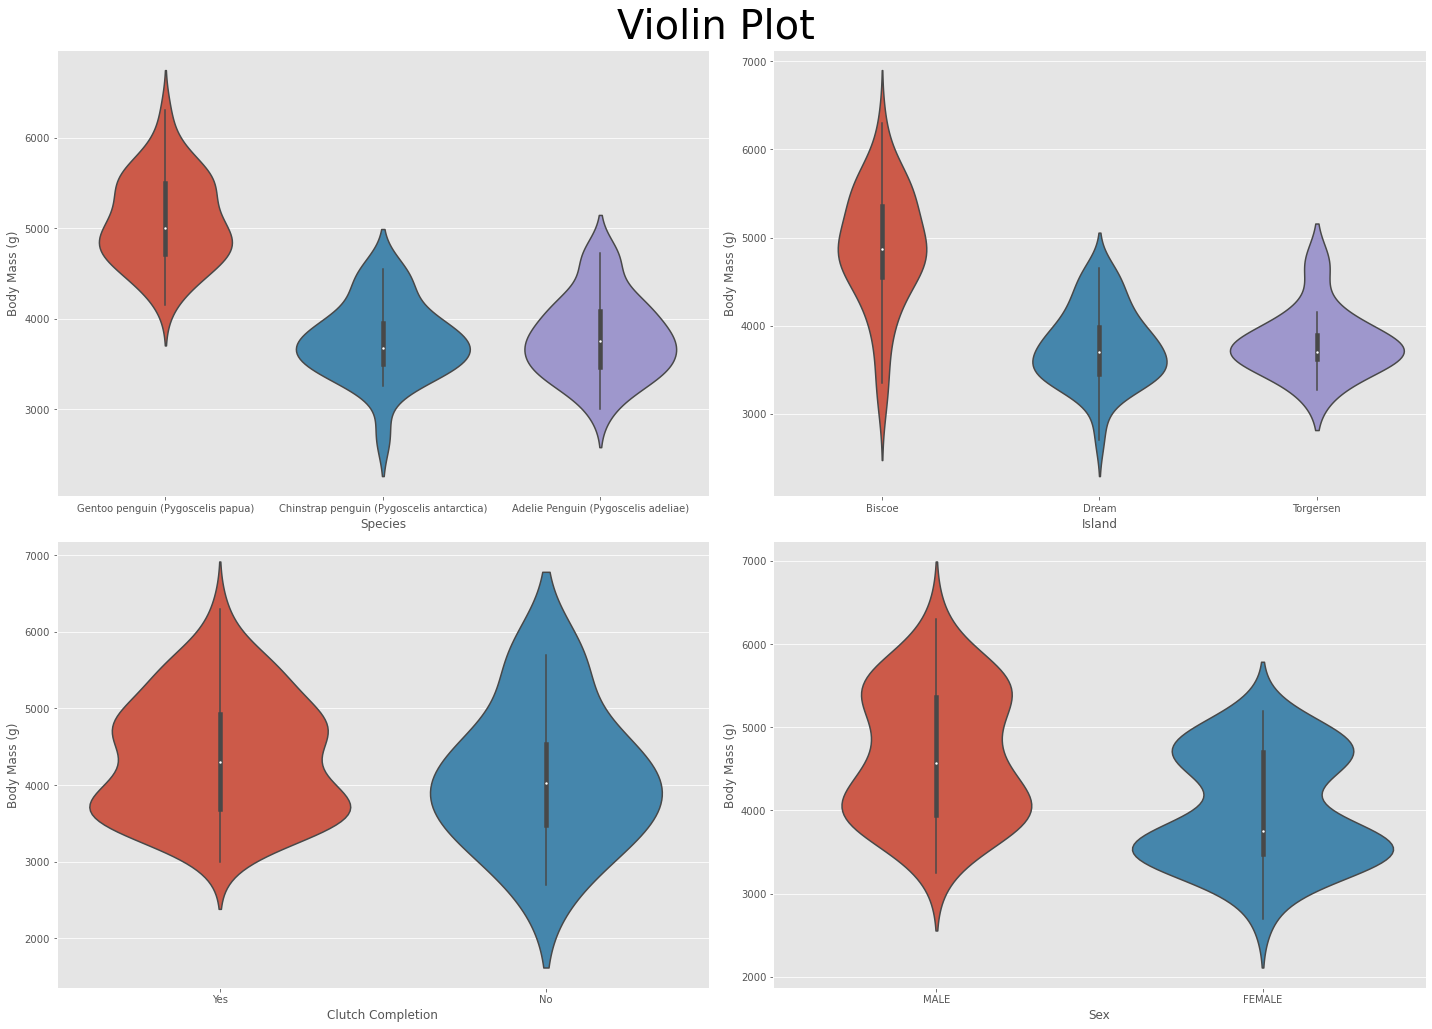

In [15]:
feature = categorical_feature

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

카테고리에 따라 target feature가 어느 정도 차이를 보이는 것을 알 수 있습니다.

이제 이 노트북에서 데이터를 둘러보는 작업은 마무리하겠습니다.

여러분은 어떤 인사이트를 얻으셨나요?

이번 EDA를 통해 어떤 방식으로 분석을 진행해야겠다는 자그마한 인사이트를 얻으셨으면 좋겠습니다.

여러분도 여러분만의 EDA를 진행하시고 코드공유에 올려주세요!

좋아요를 많이 받으시는 분께는 데이콘 후드가 제공됩니다!